# Imports:

In [1]:
from pathlib import Path

from common import CosenoidSignal, Audio
from modulation import SSBModulatedSignal

AUDIO_PATH = Path(r'toy_train_whistle.wav')

# 6) Aplicação da modulação AM-SSB acima para um sinal de áudio:

In [2]:
INTERPOLATION_SCALE_FACTOR = 10
train_whistle = Audio(AUDIO_PATH, INTERPOLATION_SCALE_FACTOR)

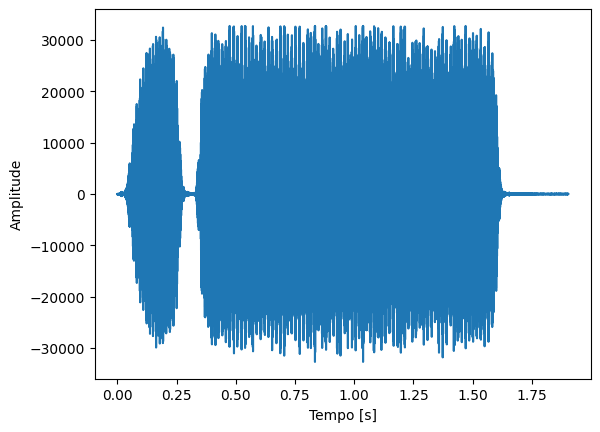

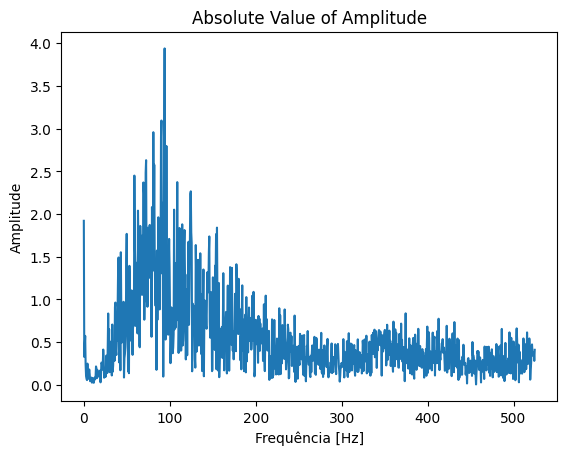

In [3]:
train_whistle.signal.plot_data(start_index=0, end_index=-1)
train_whistle.signal.plot_fourier(start_index=0, end_index=1000)

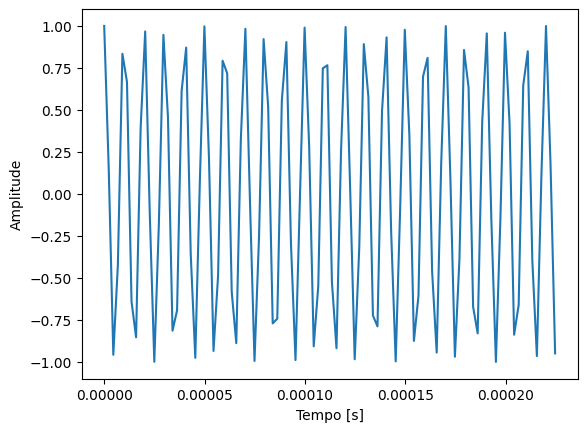

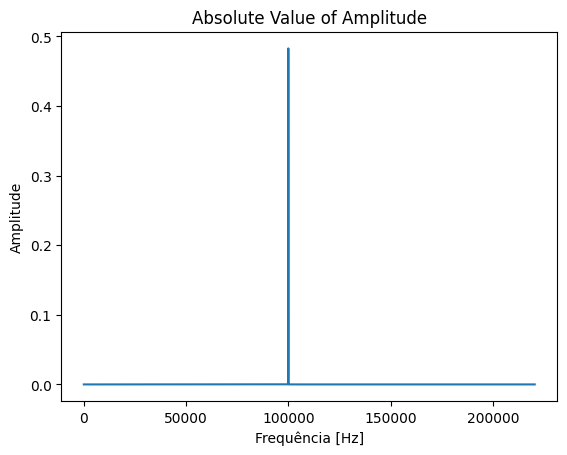

In [4]:
CARRIER_FREQUENCY = 100_000  # Hertz
CARRIER_AMPLITUDE = 1
CARRIER_PHASE = 0  # degrees

train_carrier = CosenoidSignal(CARRIER_FREQUENCY,
                               train_whistle.signal.sample_rate,
                               train_whistle.signal.length,
                               amplitude=CARRIER_AMPLITUDE,
                               phase=CARRIER_PHASE)
train_carrier.signal.plot_data(start_index=0, end_index=100)
train_carrier.signal.plot_fourier(start_index=0, end_index=-1)

Para demodulação não-coerente, temos que ter $1 + k_a m(t) \geq 0, \forall t$. Como o valor mínimo de $m(t)$ é negativo, teremos o valor máximo de $k_a$ tal que $\displaystyle \max{\left( k_{a} \right)} = - \frac{1}{\min{\left[ m(t) \right]}}$.

In [7]:
COHERENT_FILTER_ORDER = 7
COHERENT_CUTOFF_FREQUENCY = 15_000
MODULATION_TYPE = 'LSB'

modulated_whistle = SSBModulatedSignal(
    train_whistle, train_carrier, MODULATION_TYPE,
    COHERENT_FILTER_ORDER, COHERENT_CUTOFF_FREQUENCY
    )

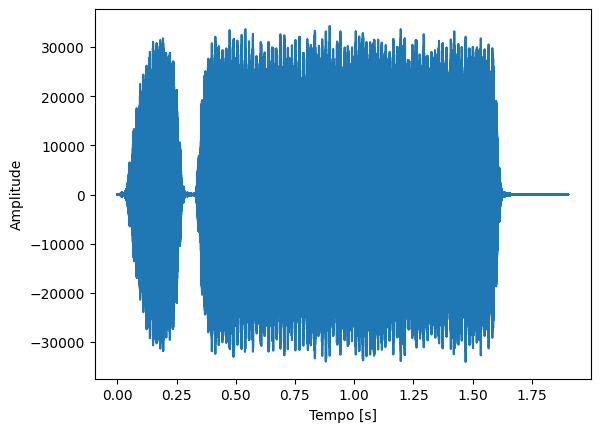

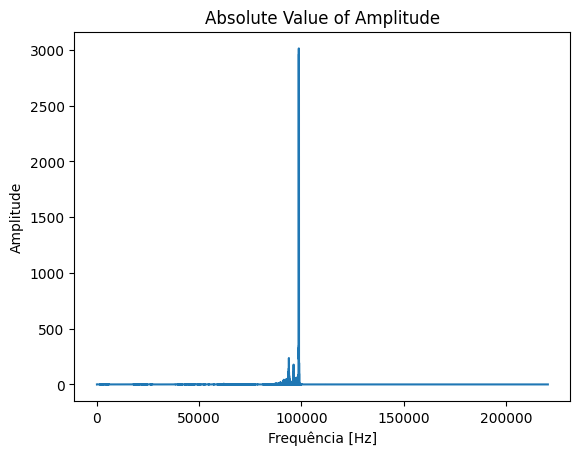

In [8]:
modulated_whistle.modulated.plot_data(start_index=0, end_index=-1)
modulated_whistle.modulated.plot_fourier(start_index=0, end_index=-1)

Demodulação coerente:

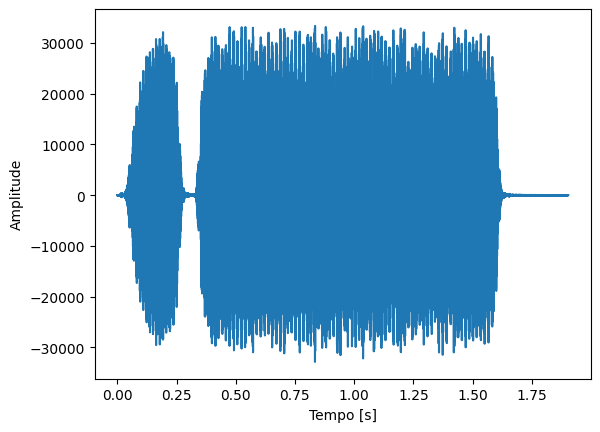

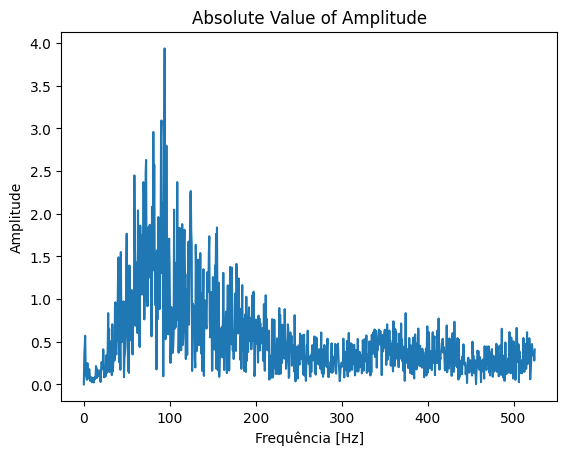

In [9]:
modulated_whistle.demodulated.plot_data(start_index=0, end_index=-1)
modulated_whistle.demodulated.plot_fourier(start_index=0, end_index=1000)

In [10]:
import IPython.display as IPydisp

data_array = modulated_whistle.demodulated.data_array
sample_rate = modulated_whistle.modulation.sample_rate
IPydisp.Audio(data_array, rate=sample_rate)